In [187]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00468/online_shoppers_intention.csv


Column Descriptions:
Administrative: This is the number of pages of this type (administrative) that the user visited.

Administrative_Duration: This is the amount of time spent in this category of pages.

Informational: This is the number of pages of this type (informational) that the user visited.

Informational_Duration: This is the amount of time spent in this category of pages.

ProductRelated: This is the number of pages of this type (product related) that the user visited.

ProductRelated_Duration: This is the amount of time spent in this category of pages.

BounceRates: The percentage of visitors who enter the website through that page and exit without triggering any additional tasks.

ExitRates: The percentage of pageviews on the website that end at that specific page.

PageValues: The average value of the page averaged over the value of the target page and/or the completion of an eCommerce transaction.
More information about how this is calculated

SpecialDay: This value represents the closeness of the browsing date to special days or holidays (eg Mother's Day or Valentine's day) in which the transaction is more likely to be finalized. More information about how this value is calculated below.

Month: Contains the month the pageview occurred, in string form.

OperatingSystems: An integer value representing the operating system that the user was on when viewing the page.

Browser: An integer value representing the browser that the user was using to view the page.

Region: An integer value representing which region the user is located in.

TrafficType: An integer value representing what type of traffic the user is categorized into.
Read more about traffic types here.

VisitorType: A string representing whether a visitor is New Visitor, Returning Visitor, or Other.

Weekend: A boolean representing whether the session is on a weekend.

Revenue: A boolean representing whether or not the user completed the purchase.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#roc_curve
from sklearn.metrics import roc_curve, auc,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [2]:
df=pd.read_csv('online_shoppers_intention.csv')
df.isna().sum()


Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [190]:
df.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

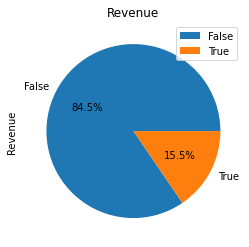

In [191]:
ax=df['Revenue'].value_counts().plot(kind='pie',autopct='%1.1f%%')
ax.set_title('Revenue')
#add legend 
labels=df['Revenue'].value_counts().keys()
ax.legend(labels,loc='best')

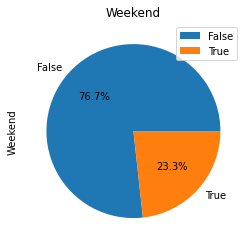

In [192]:
#unique weekend
ax=df['Weekend'].value_counts().plot(kind='pie',autopct='%1.1f%%')
ax.set_title('Weekend')
#add legend
labels=df['Weekend'].value_counts().keys()
ax.legend(labels,loc='best')


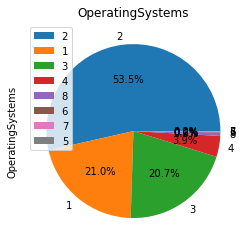

In [193]:
#pie chart for OperatingSystems
ax=df['OperatingSystems'].value_counts().plot(kind='pie',autopct='%1.1f%%')
ax.set_title('OperatingSystems')
#add legend
labels=df['OperatingSystems'].value_counts().keys()
ax.legend(labels,loc='best')

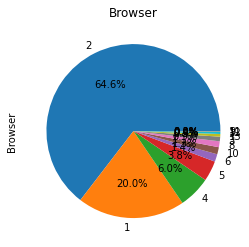

In [194]:
#pie chart for Browser
ax=df['Browser'].value_counts().plot(kind='pie',autopct='%1.1f%%')
ax.set_title('Browser')
#add legend
labels=df['Browser'].value_counts().keys()

In [195]:
df['Month'].value_counts()

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

[Text(0, 0, 'May'),
 Text(1, 0, 'November'),
 Text(2, 0, 'March'),
 Text(3, 0, 'December'),
 Text(4, 0, 'October'),
 Text(5, 0, 'September'),
 Text(6, 0, 'August'),
 Text(7, 0, 'July'),
 Text(8, 0, 'June'),
 Text(9, 0, 'February')]

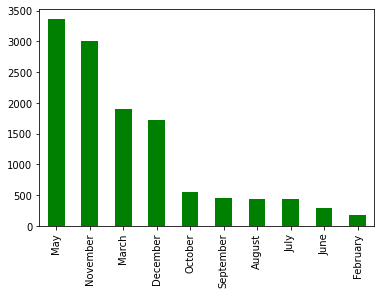

In [196]:
#bar chart for Month 
labels = "May", "November", "March", "December", "October", "September", "August", "July", "June", "February"
ax=df['Month'].value_counts().plot(kind='bar',color='green')
ax.set_xticklabels(labels)


<AxesSubplot:ylabel='VisitorType'>

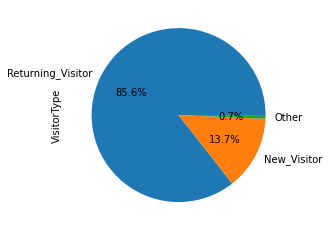

In [197]:
#pie chart for VisitorType
df['VisitorType'].value_counts().plot(kind='pie',autopct='%1.1f%%',labels=df['VisitorType'].value_counts().index)

<AxesSubplot:ylabel='TrafficType'>

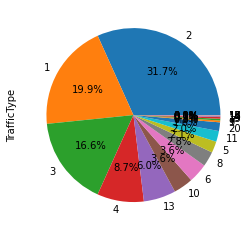

In [198]:
#pie chart for TrafficType
df['TrafficType'].value_counts().plot(kind='pie',autopct='%1.1f%%',labels=df['TrafficType'].value_counts().index)

Text(0, 0.5, 'Visitors Count')

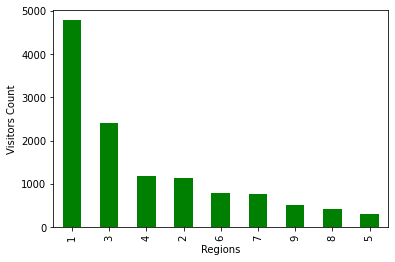

In [199]:
#bar chart for Region
ax=df['Region'].value_counts().plot(kind='bar',color='green',)
#x title
ax.set_xlabel('Regions')
ax.set_ylabel('Visitors Count')


In [200]:
#dataframe for storing Algorithm,Accuracy,Precision,Recall,roc_auc_score,f1_score
df_accuracy=pd.DataFrame(columns=['Algorithm','Accuracy','Precision','Recall','roc_auc_score','f1_score'])


In [201]:
#map objects dtype to int
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].astype('category').cat.codes


In [202]:
#drop the following columns
#Month','Browser','OperatingSystems','Region','TrafficType','Weekend'
df1=df.drop(['Month','Browser','OperatingSystems','Region','TrafficType','Weekend'],axis=1)


In [203]:

X=df1.drop(['Revenue'],axis=1)
y=df1['Revenue']
#scalling the data
sc=StandardScaler()
X=sc.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [204]:

def confusion_matrix_roc_auc(y_test,y_pred,y_pred_proba):
    cm=confusion_matrix(y_test,y_pred)
    print(cm)
    #plot confusion matrix
    fig, ax = plt.subplots(figsize=(10,10))
    display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No','Yes'])
    
    display.plot(ax=ax,cmap='Blues')
    display.ax_.set_title('Confusion Matrix')
    plt.show()
    #plot roc curve
    print("roc_auc_score:",roc_auc_score(\
                                                   y_test,y_pred))

    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
  


Train Score:  0.8876723438767234
Test Score:  0.8714517437145174
[[1994   50]
 [ 267  155]]


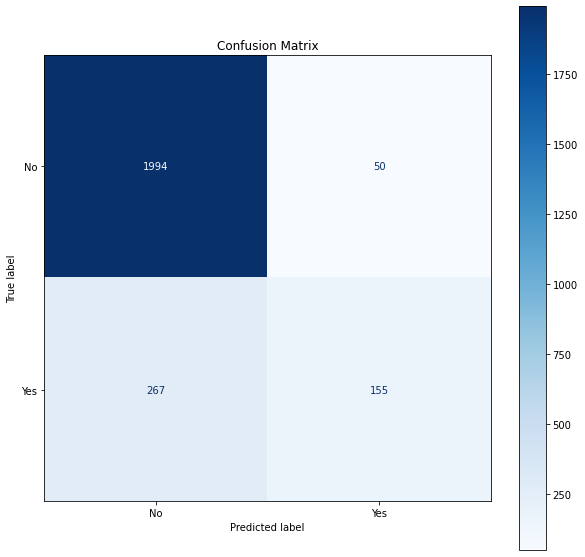

roc_auc_score: 0.6714183693343597


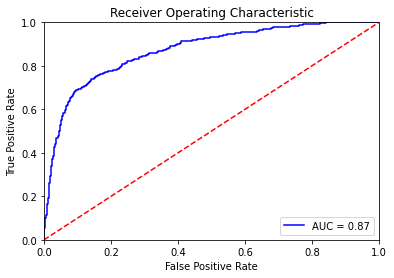

In [205]:
#logistic regression
from sklearn.linear_model import LogisticRegression

logreg=LogisticRegression()

logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)
#training vs test score
print('Train Score: ',logreg.score(X_train,y_train))
print('Test Score: ',logreg.score(X_test,y_test))
y_pred_proba=logreg.predict_proba(X_test)[:,1]
confusion_matrix_roc_auc(y_test,y_pred,y_pred_proba)
df_accuracy.loc[0]=['Logistic Regression',logreg.score(X_test,y_test),precision_score(y_test,y_pred),recall_score(y_test,y_pred),roc_auc_score(y_test,y_pred_proba),f1_score(y_test,y_pred)]


Train Score:  0.9995944849959448
Test Score:  0.8868613138686131
[[1962   82]
 [ 197  225]]


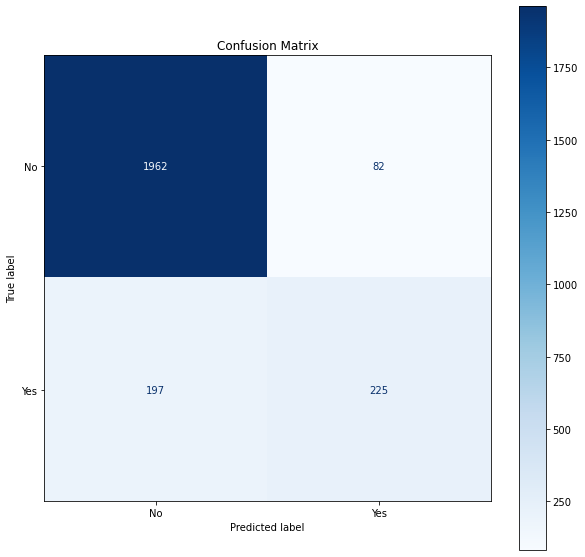

roc_auc_score: 0.7465289693102457


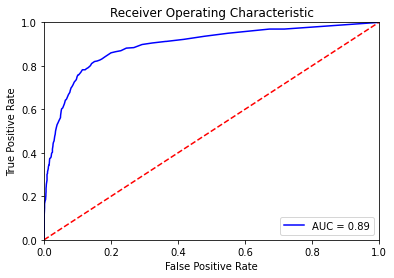

CPU times: user 2.26 s, sys: 331 ms, total: 2.59 s
Wall time: 2 s


In [206]:
%%time
#random forest
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
#training vs test score
print('Train Score: ',rf.score(X_train,y_train))
print('Test Score: ',rf.score(X_test,y_test))
y_pred_proba=rf.predict_proba(X_test)[:,1]
confusion_matrix_roc_auc(y_test,y_pred,y_pred_proba)
df_accuracy.loc[len(df_accuracy)]=['Random Forest',rf.score(X_test,y_test),rf.score(X_test,y_test),recall_score(y_test,y_pred),roc_auc_score(y_test,y_pred_proba),f1_score(y_test,y_pred)]

Train Score:  0.902676399026764
Test Score:  0.8832116788321168
[[1976   68]
 [ 220  202]]


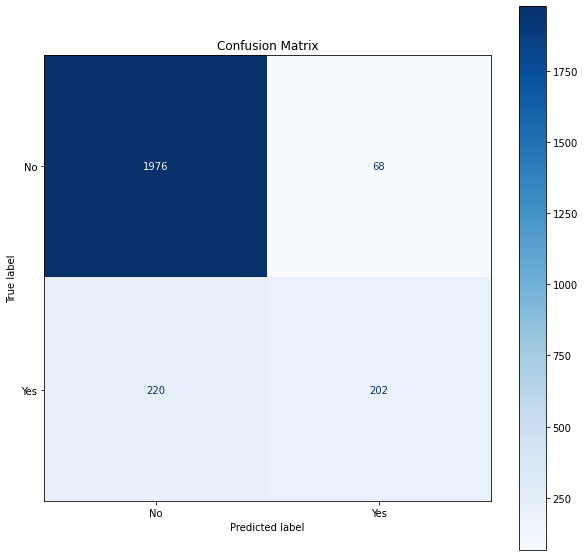

roc_auc_score: 0.722702442010369


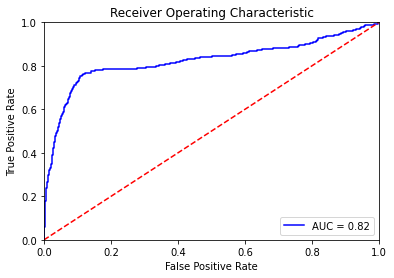

In [207]:
#svc
from sklearn.svm import SVC
svc=SVC(kernel='rbf')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
#training vs test score
print('Train Score: ',svc.score(X_train,y_train))
print('Test Score: ',svc.score(X_test,y_test))
y_pred_proba=svc.decision_function(X_test)
confusion_matrix_roc_auc(y_test,y_pred,y_pred_proba)
df_accuracy.loc[len(df_accuracy)]=['SVC',svc.score(X_test,y_test),svc.score(X_test,y_test),recall_score(y_test,y_pred),roc_auc_score(y_test,y_pred_proba),f1_score(y_test,y_pred)]

Train Score:  0.8023114355231143
Test Score:  0.7931873479318735
[[1689  355]
 [ 155  267]]


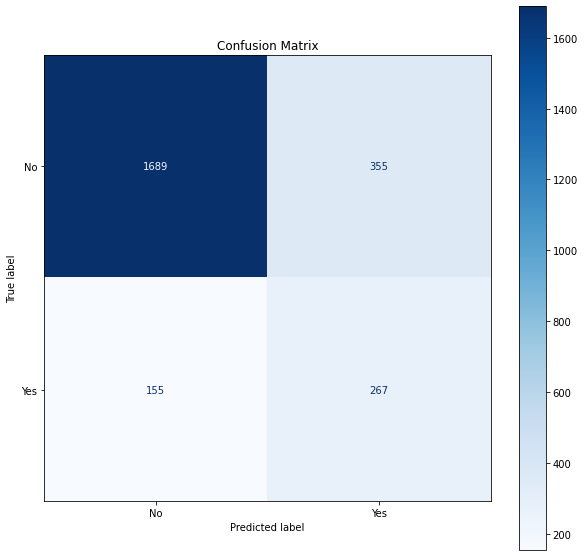

roc_auc_score: 0.729511180567793


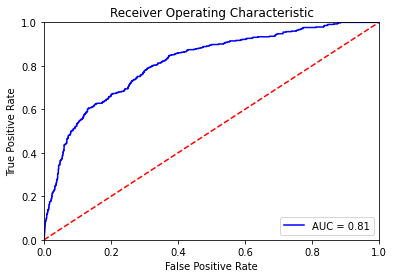

In [208]:
#gussian naive bayes
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(X_train,y_train)
y_pred=gnb.predict(X_test)
#training vs test score
print('Train Score: ',gnb.score(X_train,y_train))
print('Test Score: ',gnb.score(X_test,y_test))
y_pred_proba=gnb.predict_proba(X_test)[:,1]
confusion_matrix_roc_auc(y_test,y_pred,y_pred_proba)

df_accuracy.loc[len(df_accuracy)]=['Gaussian Naive Bayes',gnb.score(X_test,y_test),gnb.score(X_test,y_test),recall_score(y_test,y_pred),roc_auc_score(y_test,y_pred_proba),f1_score(y_test,y_pred)]

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END bootstrap=False, max_depth=6, max_features=3, min_samples_leaf=4, min_samples_split=7, n_estimators=45; total time=   0.8s
[CV] END bootstrap=False, max_depth=6, max_features=3, min_samples_leaf=4, min_samples_split=7, n_estimators=45; total time=   0.8s
[CV] END bootstrap=False, max_depth=6, max_features=3, min_samples_leaf=4, min_samples_split=7, n_estimators=45; total time=   0.9s
[CV] END bootstrap=False, max_depth=6, max_features=3, min_samples_leaf=4, min_samples_split=7, n_estimators=45; total time=   1.0s
[CV] END bootstrap=True, max_depth=13, max_features=5, min_samples_leaf=3, min_samples_split=5, n_estimators=22; total time=   0.5s
[CV] END bootstrap=False, max_depth=6, max_features=3, min_samples_leaf=4, min_samples_split=7, n_estimators=45; total time=   0.6s
[CV] END bootstrap=True, max_depth=13, max_features=5, min_samples_leaf=3, min_samples_split=5, n_estimators=22; total time=   0.6s
[CV] END bootst

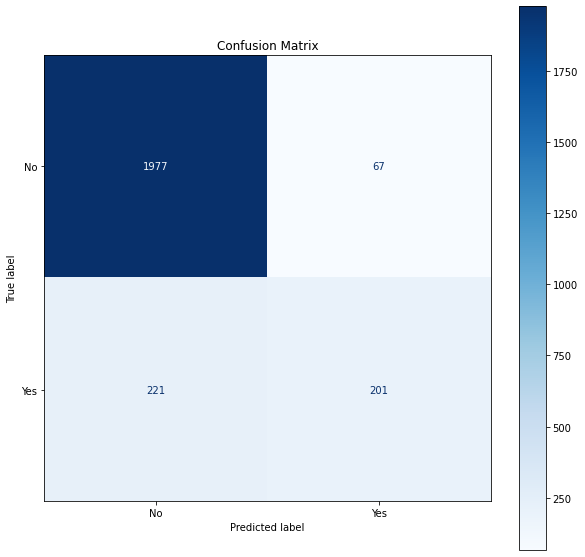

roc_auc_score: 0.7217622262824497


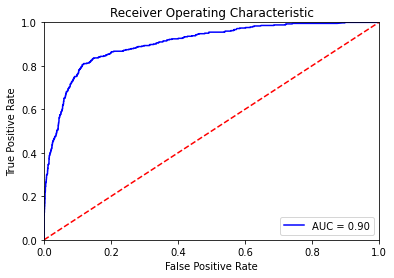

CPU times: user 1.32 s, sys: 170 ms, total: 1.49 s
Wall time: 34 s


In [209]:
%%time
#randomize grid search
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
param_dist = {
    'n_estimators': randint(low=10, high=200),
    'max_features': randint(low=1, high=10),
    'max_depth': randint(low=5, high=20),
    'min_samples_split': randint(low=2, high=10),
    'min_samples_leaf': randint(low=1, high=5),
    'bootstrap': [True, False]
}
rf=RandomForestClassifier()
clf = RandomizedSearchCV(rf, param_dist, n_iter=10, cv=5,n_jobs=-1,verbose=2)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
#training vs test score
print('Train Score: ',clf.score(X_train,y_train))
print('Test Score: ',clf.score(X_test,y_test))
y_pred_proba=clf.predict_proba(X_test)[:,1]
confusion_matrix_roc_auc(y_test,y_pred,y_pred_proba)
df_accuracy.loc[len(df_accuracy)]=['Randomized Forest with  grid search',clf.score(X_test,y_test),clf.score(X_test,y_test),recall_score(y_test,y_pred),roc_auc_score(y_test,y_pred_proba),f1_score(y_test,y_pred)]

Train Score:  0.916058394160584
Test Score:  0.8803730738037308
[[1948   96]
 [ 199  223]]


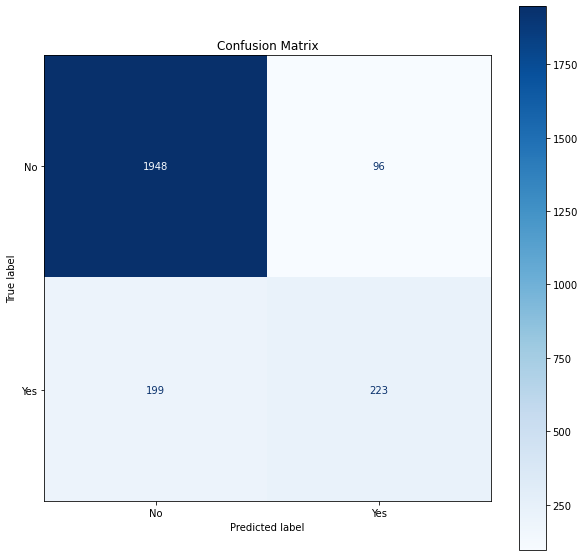

roc_auc_score: 0.7407346435295536


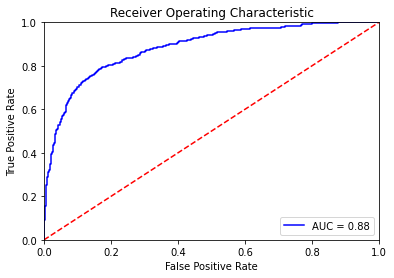

CPU times: user 15.2 s, sys: 195 ms, total: 15.4 s
Wall time: 16.8 s


In [210]:
%%time
#mlp classifier
from sklearn.neural_network import MLPClassifier
params={'hidden_layer_sizes':(10,100,10),'activation':'relu','alpha':0.0001,'max_iter':1000}
mlp=MLPClassifier()
mlp.set_params(**params)
mlp.fit(X_train,y_train)
y_pred=mlp.predict(X_test)
#training vs test score
print('Train Score: ',mlp.score(X_train,y_train))
print('Test Score: ',mlp.score(X_test,y_test))
#predict probabilities
y_pred_proba=mlp.predict_proba(X_test)[:,1]
confusion_matrix_roc_auc(y_test,y_pred,y_pred_proba)

df_accuracy.loc[len(df_accuracy)]=['MLP',mlp.score(X_test,y_test),mlp.score(X_test,y_test),recall_score(y_test,y_pred),roc_auc_score(y_test,y_pred_proba),f1_score(y_test,y_pred)]


In [211]:
df_accuracy

,Algorithm,Accuracy,Precision,Recall,roc_auc_score,f1_score
0,Logistic Regression,0.871452,0.756098,0.367299,0.871172,0.494418
1,Random Forest,0.886861,0.886861,0.533175,0.893563,0.617284
2,SVC,0.883212,0.883212,0.478673,0.823127,0.583815
3,Gaussian Naive Bayes,0.793187,0.793187,0.632701,0.814597,0.511494
4,Randomized Forest with grid search,0.883212,0.883212,0.476303,0.904028,0.582609
5,MLP,0.880373,0.880373,0.528436,0.883635,0.601889
